# Chapter3 Climatology

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

## 3.3

### 3.3.1

In [2]:
tokyo_temp = np.genfromtxt("data/Tokyo_temp.csv",
                          delimiter=",",
                          usecols=(0,1,2)
                         )
tokyo_temp

array([[1.872e+03, 1.000e+00,       nan],
       [1.872e+03, 2.000e+00,       nan],
       [1.872e+03, 3.000e+00,       nan],
       ...,
       [2.020e+03, 7.000e+00, 2.430e+01],
       [2.020e+03, 8.000e+00, 2.910e+01],
       [2.020e+03, 9.000e+00, 2.770e+01]])

In [3]:
y = tokyo_temp[:, 0]
m = tokyo_temp[:, 1]
temp = tokyo_temp[:, 2]

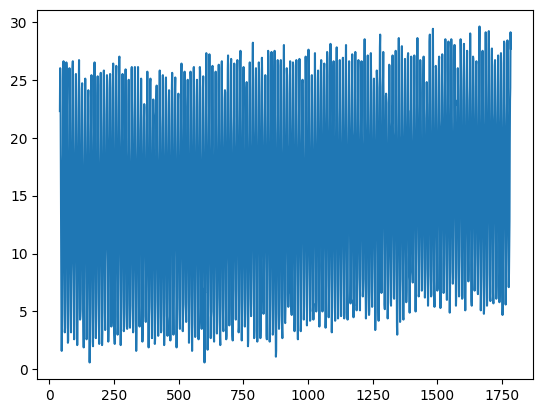

In [4]:
plt.plot(temp)
plt.show()

### 3.3.2 

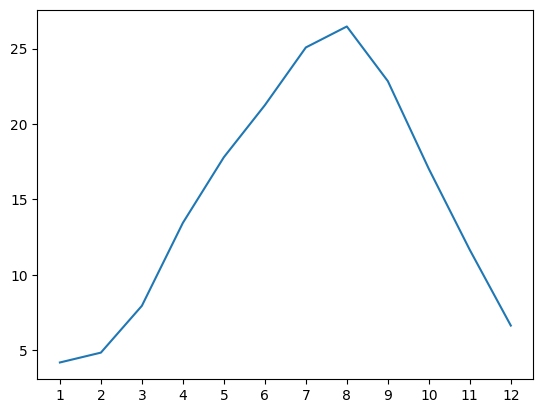

In [5]:
month = np.arange(1, 13, 1)

temp_clim = np.zeros(12)

for mm in range(1, 13):

    temp_clim[mm -1] = np.nanmean(temp[m==mm])

plt.plot(month, temp_clim)
plt.xticks(month)
plt.show()

## 3.4

In [6]:
import data_loader

sst, lon2, lat2, y, m = data_loader.load_sst()

In [7]:
[imt, jmt, tmt] = sst.shape

sst_clim = np.zeros((imt, jmt, 12))

for mm in range(1,13):
    sst_clim[:, :,mm-1] = np.mean(sst[:, :, m==mm], 2)

savefile = 'data/sstc_OISST.npz'

np.savez(savefile, sst_clim=sst_clim, lon2=lon2, lat2=lat2)

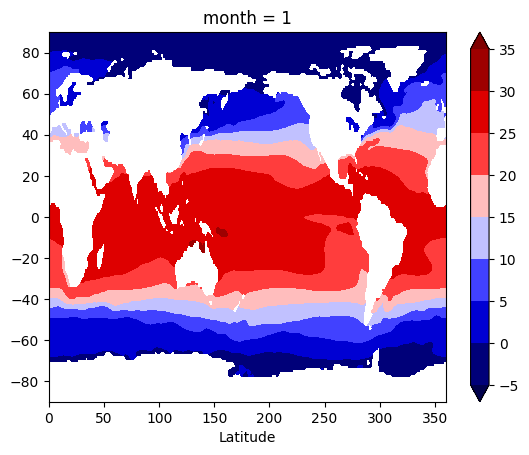

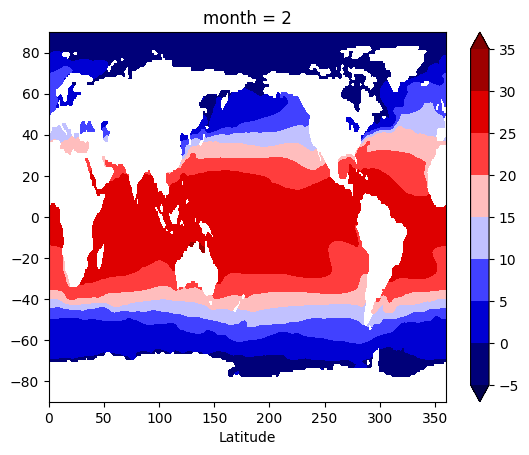

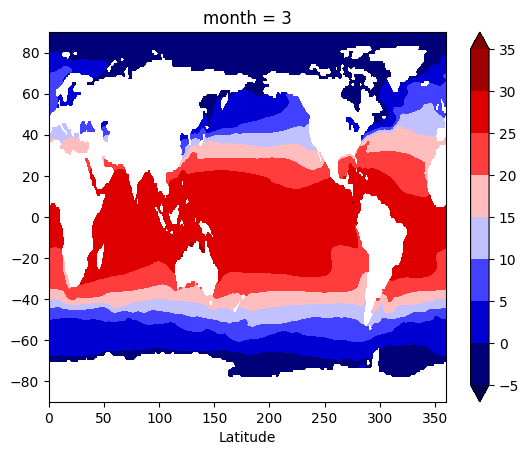

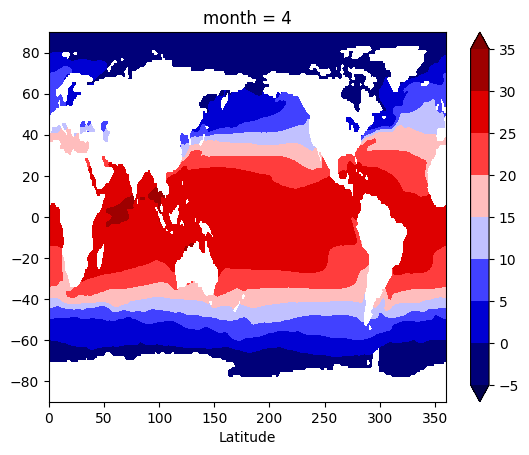

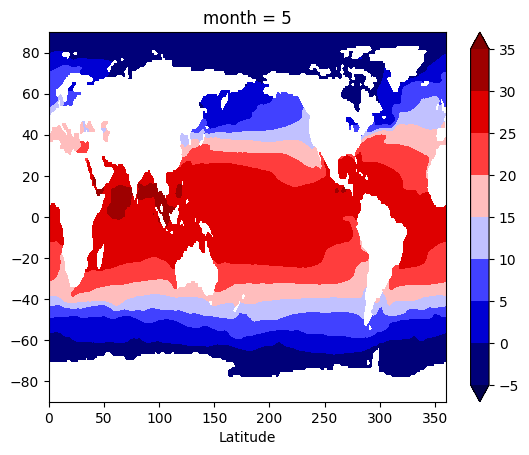

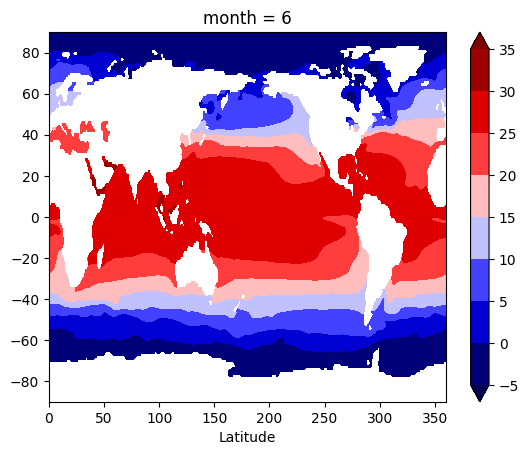

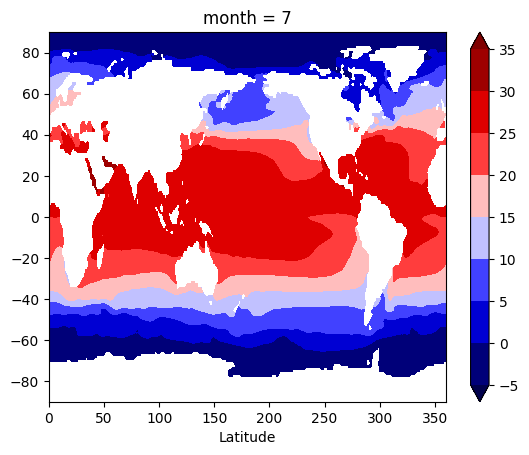

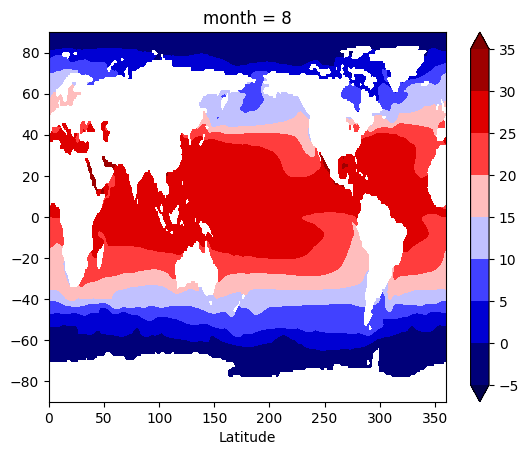

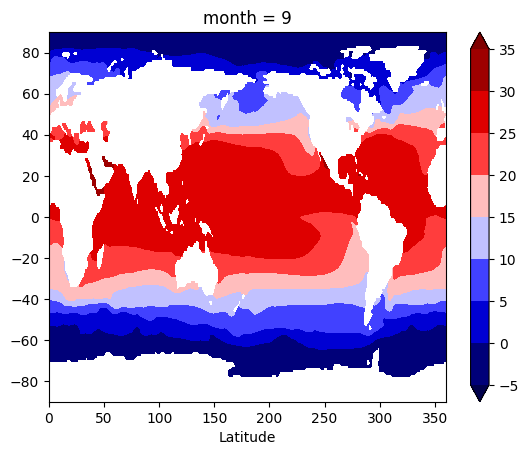

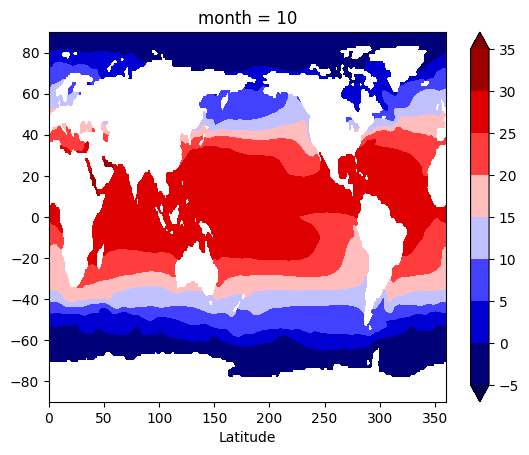

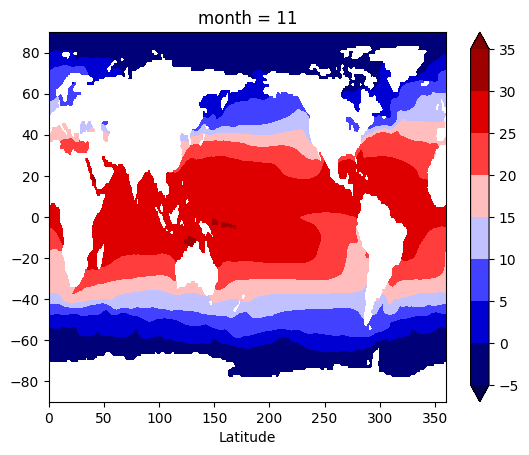

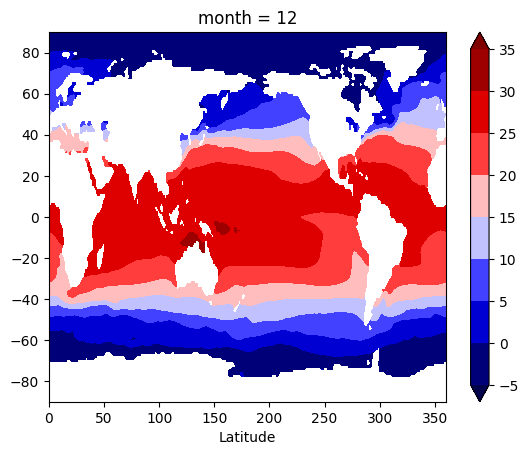

In [8]:
vmin = -5
vmax = 35
vint = 5
for mm in range(1, 13):
    cm = plt.get_cmap('seismic')
    
    cs = plt.contourf(lon2, lat2, sst_clim[:, :, mm-1], \
        cmap=cm, norm=Normalize(vmin=vmin, vmax=vmax), \
        levels=np.arange(vmin, vmax+vint, vint), extend='both')
    
    plt.colorbar(cs)
    plt.xlabel('Longitude')
    plt.xlabel('Latitude')
    plt.title('month = ' + str(mm))
    plt.xlim(0, 360)
    plt.ylim(-90, 90)
    plt.show()